<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Data_augmentation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


In [2]:
import pathlib
import imageio

# Glob the training data and load a single image path
training_paths = pathlib.Path('../content/sample_data/Face_Dataset/Heart/').glob('square_heart*.jpg')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[45]
im = imageio.imread(str(im_path))

In [3]:
# Print the image dimensions
print('Original image shape: {}'.format(im.shape))

# Coerce the image into grayscale format (if not already)
from skimage.color import rgb2gray
im_gray = rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))

Original image shape: (275, 275, 3)
New image shape: (275, 275)


Visualize image with some augmentation 

In [4]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)


Retrieve one image for augmentation

In [5]:
im = imageio.imread(str(im_path))

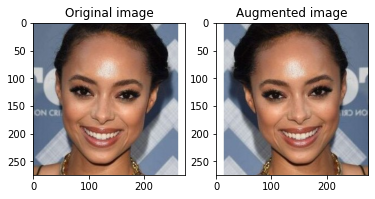

In [7]:
flipped = tf.image.flip_left_right(im)
visualize(im, flipped)


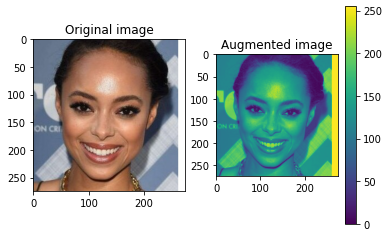

In [9]:
grayscaled = tf.image.rgb_to_grayscale(im)
visualize(im, tf.squeeze(grayscaled))
_ = plt.colorbar()


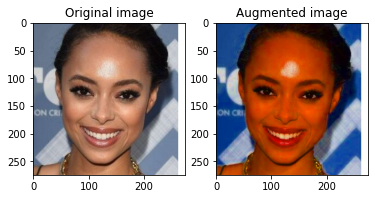

In [10]:
saturated = tf.image.adjust_saturation(im, 3)
visualize(im, saturated)


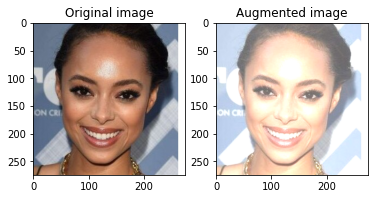

In [11]:
bright = tf.image.adjust_brightness(im, 0.4)
visualize(im, bright)


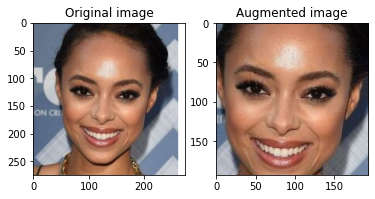

In [14]:
cropped = tf.image.central_crop(im, central_fraction=0.7)
visualize(im,cropped)


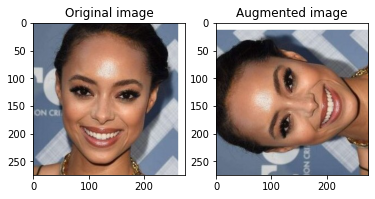

In [15]:
rotated = tf.image.rot90(im)
visualize(im, rotated)


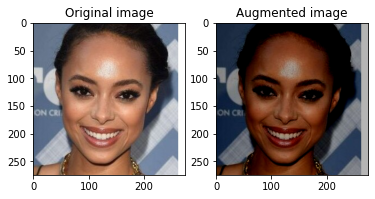

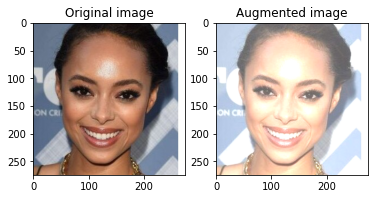

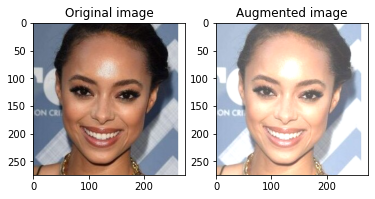

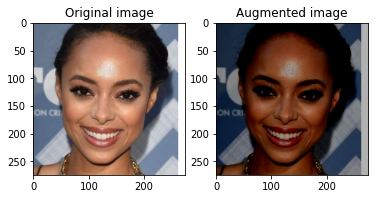

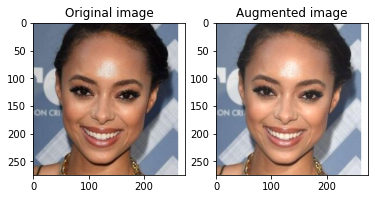

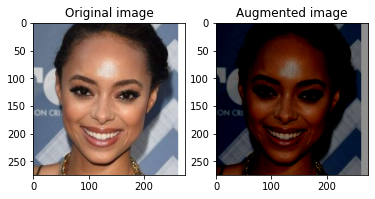

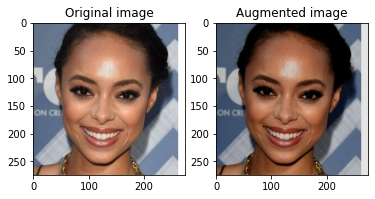

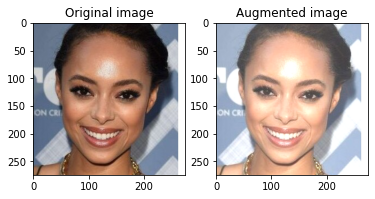

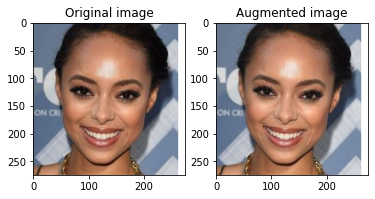

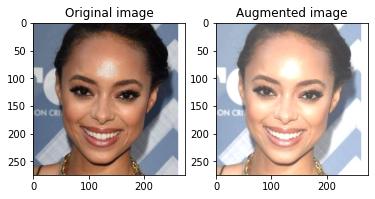

In [21]:
for i in range(10):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      im, max_delta=0.50, seed=seed)
  visualize(im, stateless_random_brightness)
